#  Internship Project: Credit Risk Prediction  
**Organization:** Developers Hub Corporation  
**Intern:** Ashna Imtiaz  
**Domain:** Data Science and Analytics  
**Task 2:** Credit Risk Prediction  



## Objective  
Predict whether a loan applicant is likely to default on a loan using machine learning models, while addressing issues like class imbalance and model overfitting.

---

##  Tools & Libraries Used  
- Python  
- Pandas, NumPy  
- Scikit-learn  
- Matplotlib, Seaborn  

---

##  Models Implemented  
- **Logistic Regression**
- **Decision Tree Classifier**
---

# import the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn .tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
!pip install kaggle -q

In [4]:
from google.colab import files
files.upload()  # upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashnaimtiaz","key":"fbdcab47edbd1aebec2908366f6764b2"}'}

In [5]:
# move the kaggle.json to the Right Directory and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# download the zipped representation of the book dataset
!kaggle datasets download -d yasserh/loan-default-dataset


Dataset URL: https://www.kaggle.com/datasets/yasserh/loan-default-dataset
License(s): CC0-1.0
  0% 0.00/4.89M [00:00<?, ?B/s]
100% 4.89M/4.89M [00:00<00:00, 249MB/s]


In [7]:
import zipfile

# Unzip file
with zipfile.ZipFile("loan-default-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("loan_default_data")

# Load into pandas
import pandas as pd
df = pd.read_csv("/content/loan_default_data/Loan_Default.csv")


In [8]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [9]:
# check missing values
df.isnull().sum()[df.isnull().any()]

,0
loan_limit,3344
approv_in_adv,908
loan_purpose,134
rate_of_interest,36439
Interest_rate_spread,36639
Upfront_charges,39642
term,41
Neg_ammortization,121
property_value,15098
income,9150


In [10]:
df.shape

(148670, 34)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

# Handling missing values

In [12]:
from sklearn.impute import SimpleImputer
import numpy as np

In [13]:
# separate numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [14]:
#impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [15]:
# Impute caatgorical columns wit mode
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [16]:

print(df.isnull().sum().sum())

0


In [17]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [18]:
df['default'] = df['Status']
df.drop(columns=['Status'], inplace=True)

In [19]:
df.default

,default
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
148665,0.0
148666,0.0
148667,0.0
148668,0.0


# Visualization

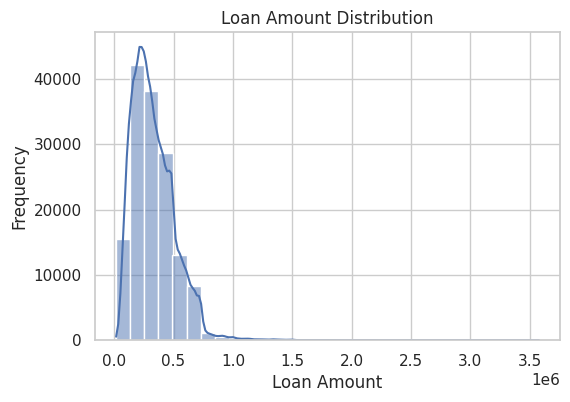

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Loan Amount
plt.figure(figsize=(6,4))
sns.histplot(df['loan_amount'], kde=True, bins=30)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


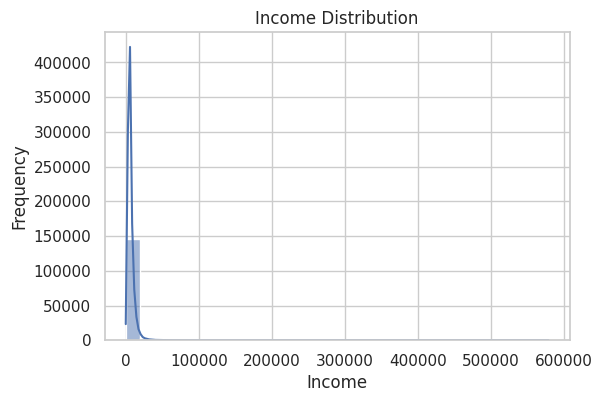

In [21]:
# Income
plt.figure(figsize=(6,4))
sns.histplot(df['income'], kde=True, bins=30)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()



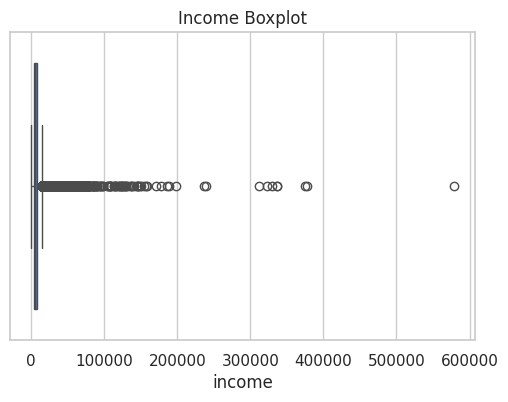

In [22]:
# Boxplot to show outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['income'])
plt.title('Income Boxplot')
plt.show()

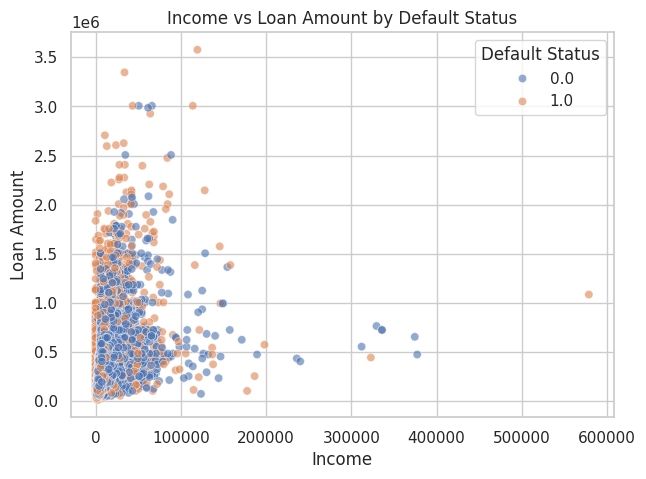

In [23]:
# Income vs Loan Amount by Default Status
plt.figure(figsize=(7,5))
sns.scatterplot(x='income', y='loan_amount', hue='default', data=df, alpha=0.6)
plt.title('Income vs Loan Amount by Default Status')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.legend(title='Default Status')
plt.show()


# split features and target

In [24]:
# features and target
X = df.drop('default', axis=1)
y = df['default']

num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns

# *Preprocessing*

In [25]:
# preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preproccessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# combine into column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols.tolist()),
        ('cat', categorical_transformer, cat_cols.tolist())
    ]
)

# split the data into train and test set

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


<Axes: xlabel='default'>

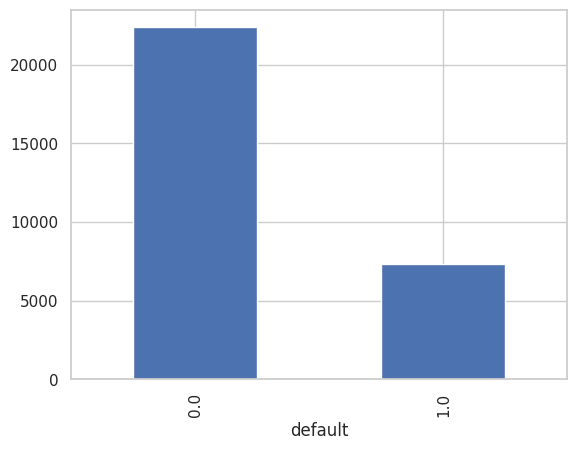

In [28]:
y_test.value_counts().plot(kind='bar')

# oversampling the minority class

In [29]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)


In [30]:
# y_train_resampled.value_counts().plot(kind='bar')
y_train_resampled.value_counts()

,count
default,
0.0,89625
1.0,89625


# Train the Logistic Regression Model

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# Define logistic regression and gridsearch parameters
logreg = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')

In [33]:
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(solver='liblinear')

In [34]:
y_pred = logreg.predict(X_test_transformed)

In [35]:
# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8432770565682384


## Classification report

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
# 4. Evaluate on test set

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


print("\nClassification Report:\n", classification_report(y_test, y_pred))



Confusion Matrix:
 [[19837  2569]
 [ 2091  5237]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.89      0.89     22406
         1.0       0.67      0.71      0.69      7328

    accuracy                           0.84     29734
   macro avg       0.79      0.80      0.79     29734
weighted avg       0.85      0.84      0.84     29734



# `plot the confusion matrix`

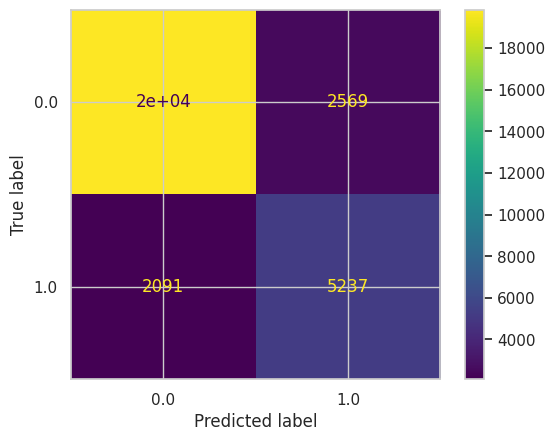

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, X_test_transformed, y_test)
plt.show()

# 2. Train the Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
dtree.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

# `plot the confusion matrix`

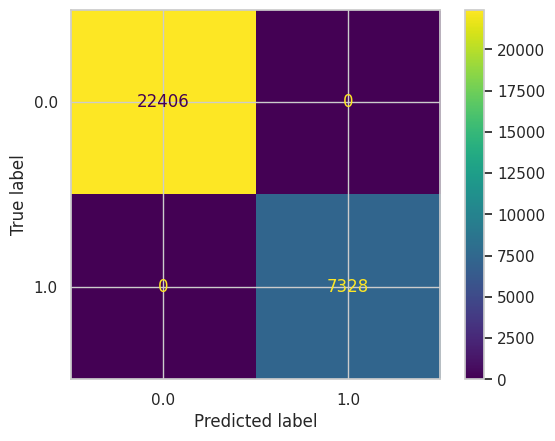

In [41]:
ConfusionMatrixDisplay.from_estimator(dtree, X_test_transformed, y_test)
plt.show()


In [42]:
y_pred_dt = dtree.predict(X_test_transformed)

In [43]:
# accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [44]:
# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Confusion Matrix:
[[22406     0]
 [    0  7328]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22406
         1.0       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



# **Apply Explainable AI (XAI)**

## For Logistic Regression:

In [45]:
!pip install shap -q

In [46]:
import shap

In [47]:
# 1. Create SHAP explainer for class 1 (loan default)
logreg_explainer = shap.Explainer(
    lambda x: logreg.predict_proba(x)[:, 1], # only class 1
    X_train_transformed
    )

In [48]:
# 2. compute SHAP values for test set
shap_values = logreg_explainer(X_test_transformed)

PermutationExplainer explainer: 29735it [07:21, 67.04it/s]                           


/tmp/ipython-input-49-1940010550.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_transformed)


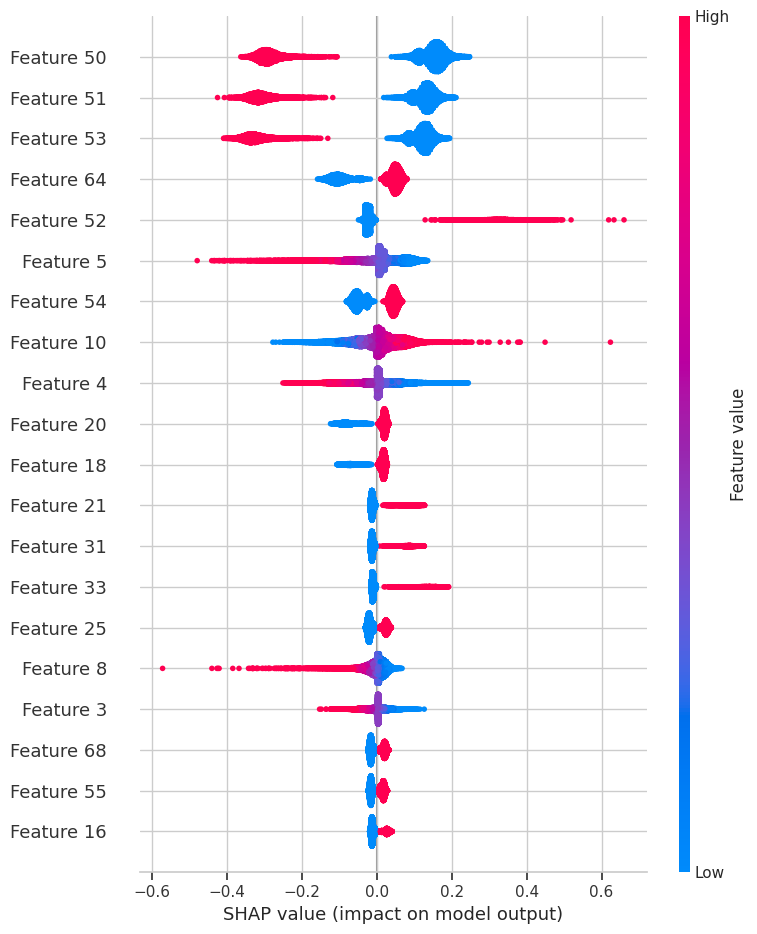

In [49]:
# 3. Plot GLOBAL summary (most important features across all predictions)
shap.summary_plot(shap_values, X_test_transformed)

In [50]:
logreg.classes_

array([0., 1.])

In [51]:
# Print the shape info (debug)
print(shap_values.shape)

# 29734 → number of test samples
# 71 → number of features
# 2 → number of classes (class 0: No Default, class 1: Default)

(29734, 71)


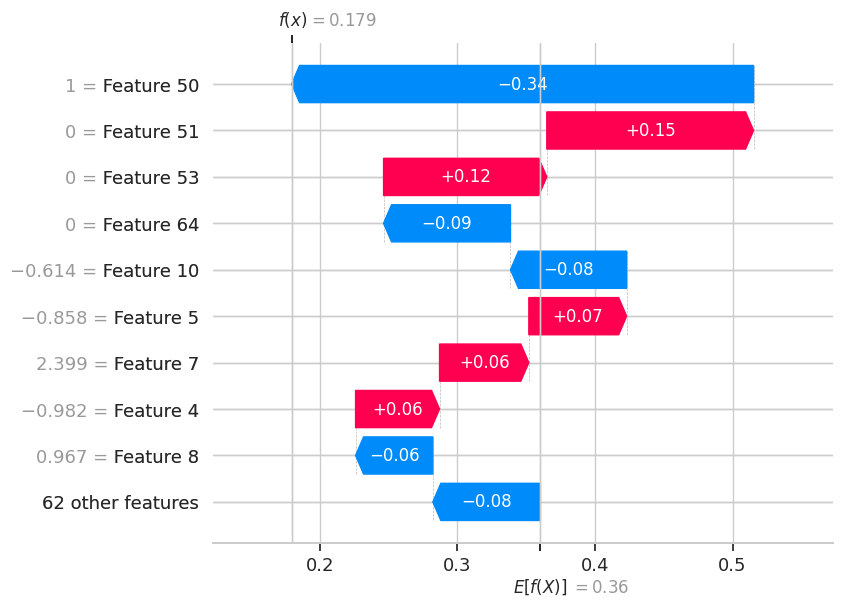

In [52]:
# 4. Plot LOCAL explanation (for a single applicant)
sample_index = 0

# show waterfall plot for that prediction
shap.plots.waterfall(shap_values[sample_index])

# For Decision Tree:

In [54]:

# Initialize TreeExplainer for decision tree
dtree_explainer = shap.Explainer(dtree, X_train_transformed)

In [55]:

# Calculate SHAP values
dtree_shap_values = dtree_explainer(X_test_transformed)

/tmp/ipython-input-57-2861382203.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(dtree_shap_values, X_test_transformed)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


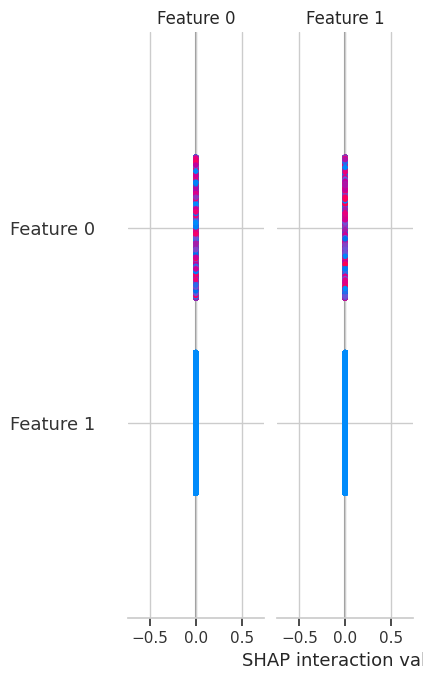

In [57]:
shap.summary_plot(dtree_shap_values, X_test_transformed)


In [69]:
# Extract feature names after transformation
# Get the feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()



In [ ]:
dtree_shap_values[0].base_values  # Base value (log-odds or prob)
dtree_shap_values[0].values       # SHAP values for each feature


In [70]:
import pandas as pd

X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)


In [80]:
dtree_shap_values_class1 = dtree_shap_values[:, :, 1]

In [83]:
dtree_shap_values_class1[0]

.values =
array([ 0.        ,  0.        ,  0.        ,  0.        , -0.20824883,
       -0.00174882,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.     

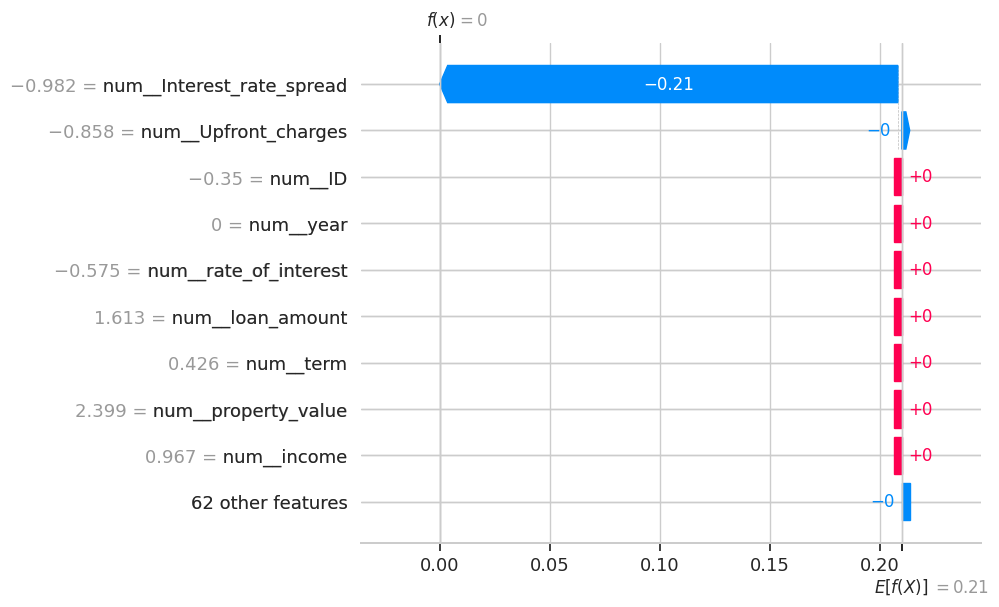

In [84]:
# Explanation for first test sample and class 1
explanation = shap.Explanation(
    values=dtree_shap_values_class1[0],
    base_values=dtree_shap_values.base_values[1],
    data=X_test_transformed_df.iloc[0],
    feature_names=feature_names
)

# Waterfall plot
shap.plots.waterfall(explanation)


/tmp/ipython-input-85-2461719274.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(dtree_shap_values_class1, X_test_transformed)


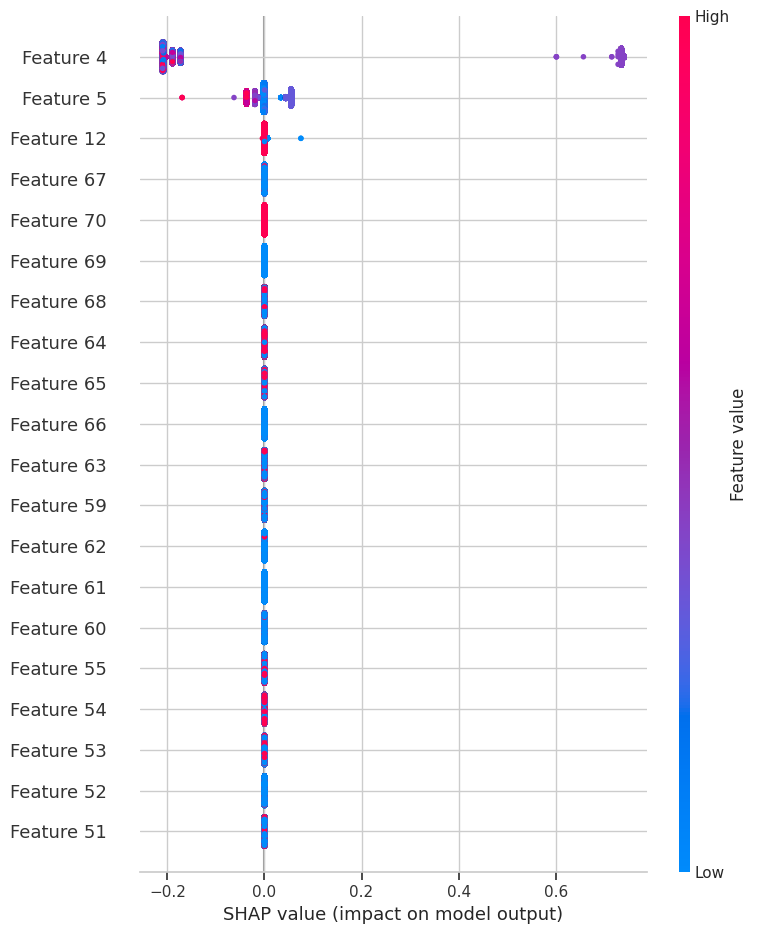

In [85]:
shap.summary_plot(dtree_shap_values_class1, X_test_transformed)

/tmp/ipython-input-86-3302730061.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(dtree_shap_values_class1, X_test_transformed_df)


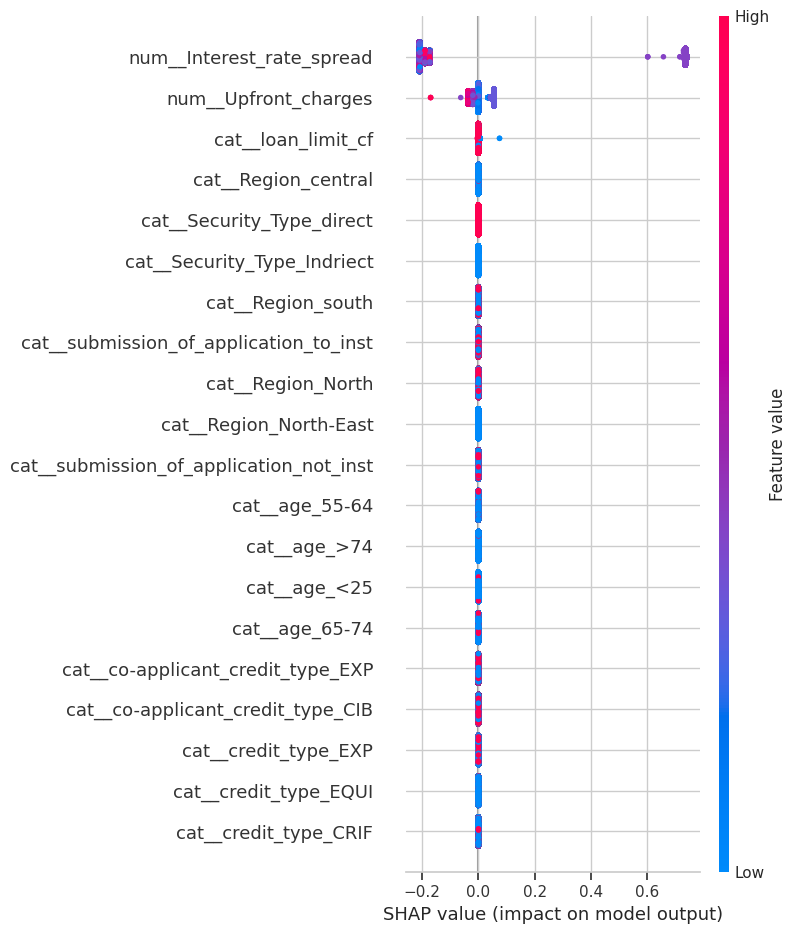

In [86]:
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())
shap.summary_plot(dtree_shap_values_class1, X_test_transformed_df)
